In [7]:
import qiskit

In [8]:
qiskit.__version__

'1.4.2'

In [9]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
print(qc)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


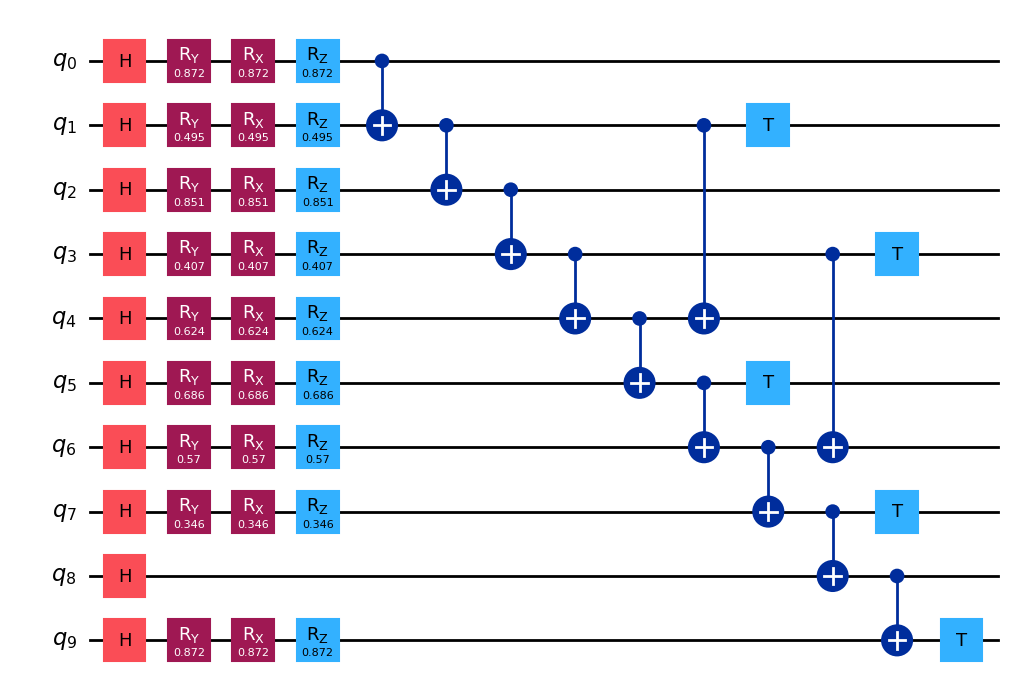

In [10]:
from qiskit import QuantumCircuit
import numpy as np

# Create a quantum circuit with 10 qubits
qc = QuantumCircuit(10)

# Apply Hadamard gates to all qubits
for i in range(10):
    qc.h(i)

# Apply R_y, R_x, and R_z rotations with given parameters
rotations = [
    (0.872, 0.872, 0.872),
    (0.495, 0.495, 0.495),
    (0.851, 0.851, 0.851),
    (0.407, 0.407, 0.407),
    (0.624, 0.624, 0.624),
    (0.686, 0.686, 0.686),
    (0.57, 0.57, 0.57),
    (0.346, 0.346, 0.346),
    (0, 0, 0),  # q8 has no rotation
    (0.872, 0.872, 0.872)
]

for i, (ry, rx, rz) in enumerate(rotations):
    if i != 8:  # Skip q8 as it has no rotation
        qc.ry(ry, i)
        qc.rx(rx, i)
        qc.rz(rz, i)

# Apply CNOT gates (assuming the pattern from the image)
cnot_pairs = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5),
    (5, 6), (6, 7), (7, 8), (8, 9), (3, 6), (1, 4)
]
for control, target in cnot_pairs:
    qc.cx(control, target)

# Apply T gates at specific positions
t_gates = [1, 3, 5, 7, 9]
for qubit in t_gates:
    qc.t(qubit)

# Draw the circuit
qc.draw("mpl")


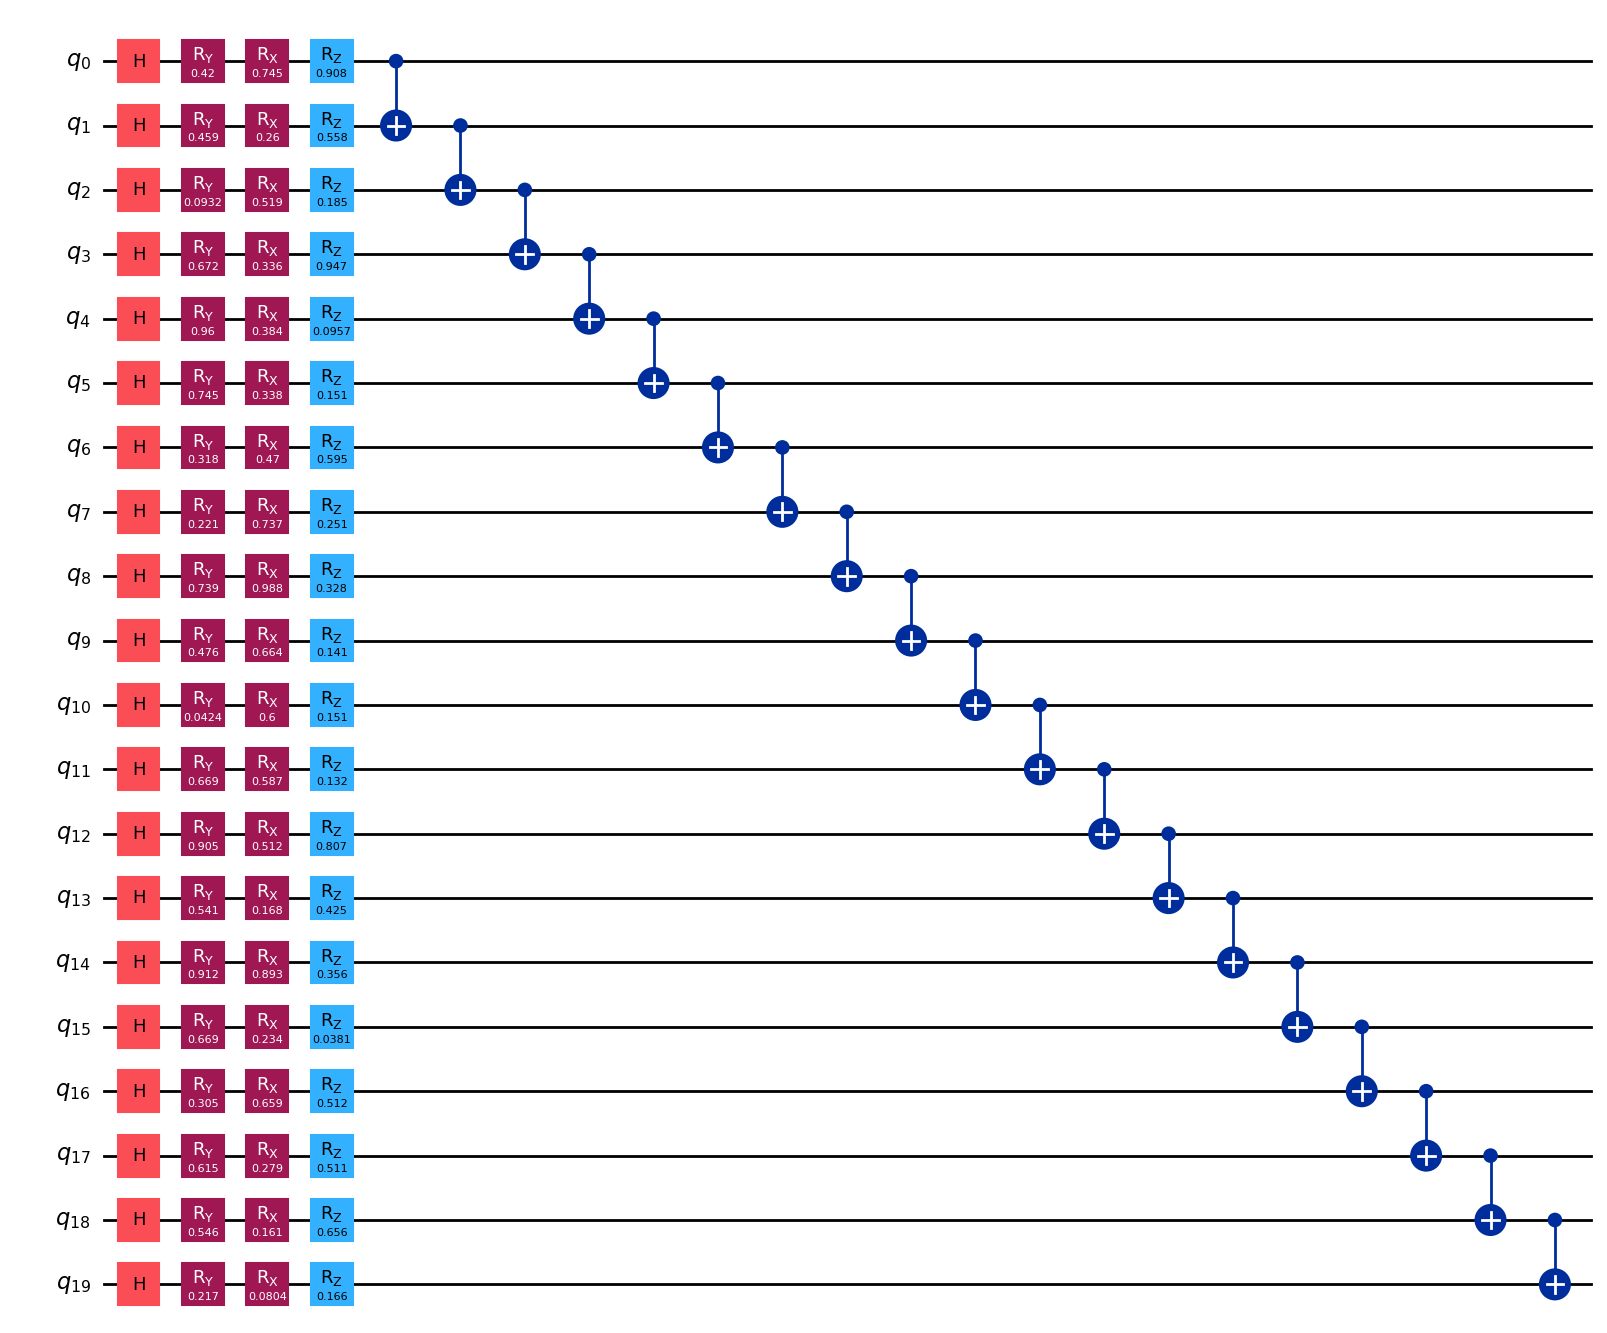

In [11]:
from qiskit import QuantumCircuit
import numpy as np

# Define the 20 standard amino acids
amino_acids = [
    "Ala", "Arg", "Asn", "Asp", "Cys", "Gln", "Glu", "Gly", "His", "Ile",
    "Leu", "Lys", "Met", "Phe", "Pro", "Ser", "Thr", "Trp", "Tyr", "Val"
]

# Create a quantum circuit with 20 qubits (one per amino acid)
qc = QuantumCircuit(20)

# Example encoding: Rotation values for each amino acid (placeholders for real properties)
rotation_values = np.random.rand(20, 3)  # Random Ry, Rx, Rz values for demonstration

# Apply Hadamard gates to all qubits
for i in range(20):
    qc.h(i)

# Apply R_y, R_x, and R_z rotations for each amino acid
for i, (ry, rx, rz) in enumerate(rotation_values):
    qc.ry(ry, i)
    qc.rx(rx, i)
    qc.rz(rz, i)

# Apply entanglement using CNOT gates (example pattern)
cnot_pairs = [(i, i+1) for i in range(19)]  # Chain entanglement
for control, target in cnot_pairs:
    qc.cx(control, target)

# Draw the circuit
qc.draw("mpl")


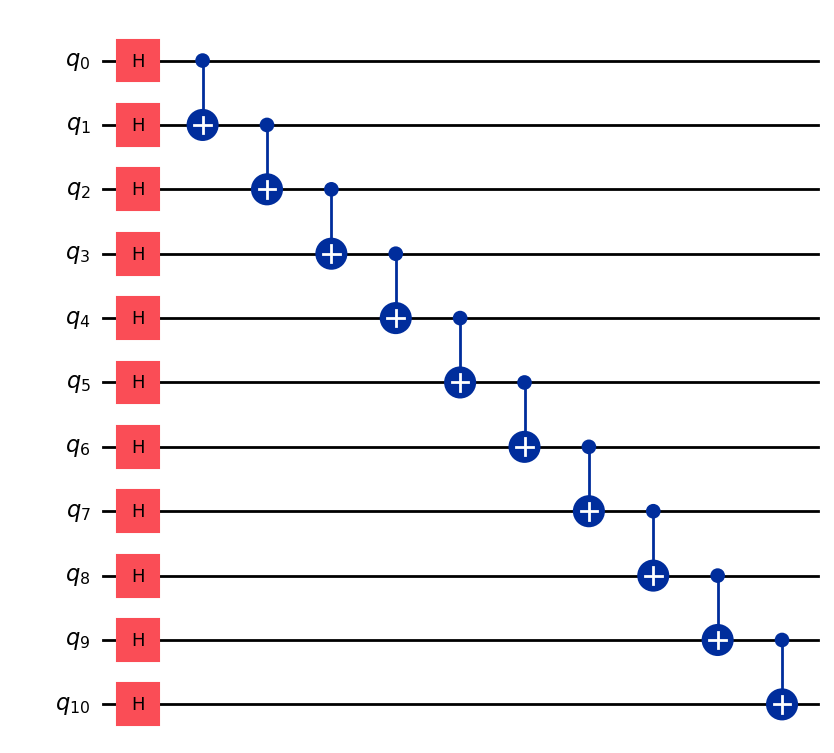

In [12]:
from qiskit import QuantumCircuit
amino_acids=[]
qc = QuantumCircuit(11)
for i in range (11):
    qc.h(i)
for j in range (10):
     qc.cx(j,j+1)
qc.draw(output='mpl')

7


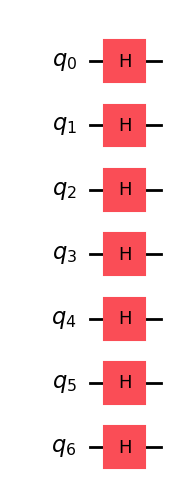

In [13]:
from qiskit import QuantumCircuit
amino_acids=input("enter the amino acid:")
n=len(amino_acids)
qc=QuantumCircuit(n)
for i in range (n):
    qc.h(i)
print(n)
qc.draw(output='mpl')


In [14]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Use AerSimulator from qiskit-aer
from qiskit import transpile

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits = turn2qubit.count('q')

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Qubits Configured:", num_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Create a quantum circuit with the required number of qubits
qc = QuantumCircuit(num_qubits)

# Apply quantum gates to the qubits (example: Hadamard gates)
for qubit in range(num_qubits):
    qc.h(qubit)  # Apply Hadamard gate to each qubit

# Measure all qubits (optional)
qc.measure_all()

# Print the quantum circuit
print("\nQuantum Circuit:")
qc.draw(output='mpl')

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Use AerSimulator from qiskit-aer

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement results
counts = result.get_counts()
print("\nMeasurement Results:")
print(counts)

Protein Sequence: DFBHBSHB
Turn-to-Qubit Mapping: 0100qqqqqqqqqq
Number of Qubits Configured: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)
Bit 12: q (Qubit)
Bit 13: q (Qubit)

Quantum Circuit:

Measurement Results:
{'0011000111': 3, '1001011110': 3, '0110101011': 2, '1110001100': 3, '1000011010': 1, '0000101000': 1, '1000000010': 1, '1111111010': 2, '0110000011': 2, '1100010110': 2, '0010001000': 3, '0101101010': 3, '1011110110': 2, '1000101111': 2, '1011100011': 2, '1101001010': 1, '1010110110': 2, '1101010110': 1, '1101111010': 3, '0100111100': 2, '0000011011': 1, '0001100111': 2, '0000001101': 1, '1101001100': 1, '1011001100': 1, '0101001001': 1, '1101010011': 2, '1010110011': 1, '0000001100': 2, '1101001101': 1, '1100000000': 1, '0010010010': 2, '1011011110': 2, '1000101101': 1, '1011100001': 2, '0011111001': 1, '1

In [15]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Use AerSimulator from qiskit-aer
from qiskit import transpile
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits = turn2qubit.count('q')

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Qubits Configured:", num_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Create a quantum circuit with the required number of qubits
qc = QuantumCircuit(num_qubits)

# Apply quantum gates to the qubits (example: Hadamard gates)
for qubit in range(num_qubits):
    qc.h(qubit)  # Apply Hadamard gate to each qubit

# Measure all qubits (optional)
qc.measure_all()

# Draw the quantum circuit in Matplotlib (mpl) format
print("\nQuantum Circuit (Matplotlib Format):")
qc.draw(output='mpl', style='clifford')  # Use 'mpl' for Matplotlib output
plt.show()  # Display the circuit

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Use AerSimulator from qiskit-aer

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement results
counts = result.get_counts()
print("\nMeasurement Results:")
print(counts)

ValueError: Protein sequence must have at least 2 beads.

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Use AerSimulator from qiskit-aer
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt  # For circuit visualization

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Create a quantum circuit with the required number of qubits
qc = QuantumCircuit(total_qubits)

# Apply quantum gates to the configuration qubits (example: Hadamard gates)
for qubit in range(num_qubits_config):
    qc.h(qubit)  # Apply Hadamard gate to each configuration qubit

# Apply quantum gates to the interaction qubits (example: X gates for demonstration)
for qubit in range(num_qubits_config, total_qubits):
    qc.x(qubit)  # Apply X gate to each interaction qubit

# Measure all qubits (optional)
qc.measure_all()

# Print the quantum circuit in text format
print("\nQuantum Circuit (Text Format):")
print(qc)

# Draw the quantum circuit in Matplotlib (mpl) format
print("\nQuantum Circuit (Matplotlib Format):")
qc.draw(output='mpl', style='clifford')  # Use 'mpl' for Matplotlib output
plt.show()  # Display the circuit

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Use AerSimulator from qiskit-aer

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement results
counts = result.get_counts()
print("\nMeasurement Results:")
print(counts)

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100qqqqqqqq
Number of Configuration Qubits: 8
Number of Interaction Qubits: 2
Total Qubits: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Use AerSimulator from qiskit-aer
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt  # For circuit visualization

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Create a quantum circuit with the required number of qubits
qc = QuantumCircuit(total_qubits)

# Apply quantum gates to the configuration qubits (example: Hadamard gates)
for qubit in range(num_qubits_config):
    qc.h(qubit)  # Apply Hadamard gate to each configuration qubit

# Apply quantum gates to the interaction qubits (example: X gates for demonstration)
for qubit in range(num_qubits_config, total_qubits):
    qc.x(qubit)  # Apply X gate to each interaction qubit

# Measure all qubits (optional)
qc.measure_all()

# Print the quantum circuit in text format
print("\nQuantum Circuit (Text Format):")
print(qc)

# Draw the quantum circuit in Matplotlib (mpl) format
print("\nQuantum Circuit (Matplotlib Format):")
qc.draw(output='mpl', style='clifford')  # Use 'mpl' for Matplotlib output
plt.show()  # Display the circuit

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Use AerSimulator from qiskit-aer

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement results
counts = result.get_counts()
print("\nMeasurement Results:")
print(counts)

# Prepare bitstrings for energy calculation
bitstrings = [format(int(key, 2), f'0{total_qubits}b') for key in counts.keys()]

# Calculate energies using exactHamiltonian
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy
}

energies = exact_hamiltonian(bitstrings, hyperParams)
print("\nEnergies for Each Fold:")
for bitstring, energy in zip(bitstrings, energies):
    print(f"Bitstring: {bitstring}, Energy: {energy}")

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100qqqqqqqq
Number of Configuration Qubits: 8
Number of Interaction Qubits: 2
Total Qubits: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Use AerSimulator from qiskit-aer
from qiskit import transpile
import numpy as np
import matplotlib.pyplot as plt  # For circuit visualization

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Create a quantum circuit with the required number of qubits
qc = QuantumCircuit(total_qubits)

# Apply quantum gates to the configuration qubits (example: Hadamard gates)
for qubit in range(num_qubits_config):
    qc.h(qubit)  # Apply Hadamard gate to each configuration qubit

# Apply quantum gates to the interaction qubits (example: X gates for demonstration)
for qubit in range(num_qubits_config, total_qubits):
    qc.x(qubit)  # Apply X gate to each interaction qubit

# Measure all qubits (optional)
qc.measure_all()

# Print the quantum circuit in text format
print("\nQuantum Circuit (Text Format):")
print(qc)

# Draw the quantum circuit in Matplotlib (mpl) format
print("\nQuantum Circuit (Matplotlib Format):")
qc.draw(output='mpl', style='clifford')  # Use 'mpl' for Matplotlib output
plt.show()  # Display the circuit

# Simulate the circuit using AerSimulator
simulator = AerSimulator()  # Use AerSimulator from qiskit-aer

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement results
counts = result.get_counts()
print("\nMeasurement Results:")
print(counts)

# Prepare bitstrings for energy calculation
bitstrings = [format(int(key, 2), f'0{total_qubits}b') for key in counts.keys()]

# Calculate energies using exactHamiltonian
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy
}

energies = exact_hamiltonian(bitstrings, hyperParams)
print("\nEnergies for Each Fold:")
for bitstring, energy in zip(bitstrings, energies):
    print(f"Bitstring: {bitstring}, Energy: {energy}")

# Compute minimum energy for all possible folds
all_folds = [format(i, f'0{total_qubits}b') for i in range(2**total_qubits)]
all_energies = exact_hamiltonian(all_folds, hyperParams)

# Find the minimum energy and corresponding folds
min_energy = np.min(all_energies)
min_energy_indices = np.where(all_energies == min_energy)[0]
min_energy_folds = [all_folds[i] for i in min_energy_indices]

# Print the results
print("\nMinimum Energy Folds:")
print(f"Minimum Energy: {min_energy}")
print("Folds with Minimum Energy:")
for fold in min_energy_folds:
    print(fold)

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100qqqqqqqq
Number of Configuration Qubits: 8
Number of Interaction Qubits: 2
Total Qubits: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(ansatz, simulator)
    job = execute(compiled_circuit, simulator, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = [format(int(key, 2), f'0{len(parameters)}b') for key in counts.keys()]
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

ImportError: cannot import name 'Aer' from 'qiskit' (c:\Users\vinaykumar\miniconda3\envs\cwq\Lib\site-packages\qiskit\__init__.py)

In [ ]:
from qiskit import QuantumCircuit, transpile  # Import QuantumCircuit and transpile from qiskit
from qiskit_aer import Aer  # Import Aer from qiskit_aer
from qiskit.visualization import plot_histogram  # For visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(ansatz, simulator)
    job = execute(compiled_circuit, simulator, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = [format(int(key, 2), f'0{len(parameters)}b') for key in counts.keys()]
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100qqqqqqqq
Number of Configuration Qubits: 8
Number of Interaction Qubits: 2
Total Qubits: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52

NameError: name 'execute' is not defined

In [ ]:
from qiskit import QuantumCircuit, transpile  # Import QuantumCircuit and transpile from qiskit
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram  # For visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit using AerSimulator
    simulator = AerSimulator()  # Use AerSimulator
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = [format(int(key, 2), f'0{len(parameters)}b') for key in counts.keys()]
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

Protein Sequence: APALRFY
Turn-to-Qubit Mapping: 0100qqqqqqqq
Number of Configuration Qubits: 8
Number of Interaction Qubits: 2
Total Qubits: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -5.53390395 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -4.72771721 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-5.53390395 -4.72771721 -5.53390395 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-0.51822183 -3.62222835 -0.51822183 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.94388946 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -1.38003988 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -4.01036345 -4.35038489 -2.67579237 -3.28677813
  -3.52

QiskitError: 'No counts for experiment "0"'

In [ ]:
from qiskit import QuantumCircuit, transpile  # Import QuantumCircuit and transpile from qiskit
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram  # For visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits, num_qubits)  # Add classical registers for measurement
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
    qc.measure_all()  # Measure all qubits
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit using AerSimulator
    simulator = AerSimulator()  # Use AerSimulator
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = [format(int(key, 2), f'0{len(parameters)}b') for key in counts.keys()]
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100qqqqqqqq
Number of Configuration Qubits: 8
Number of Interaction Qubits: 2
Total Qubits: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52

ValueError: invalid literal for int() with base 2: '0001011100 0000000000'

In [ ]:
from qiskit import QuantumCircuit, transpile  # Import QuantumCircuit and transpile from qiskit
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram  # For visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first four bits are fixed as '0100', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first four bits are '0100'
    fixed_bits = '0100'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits, num_qubits)  # Add classical registers for measurement
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
    qc.measure_all()  # Measure all qubits
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit using AerSimulator
    simulator = AerSimulator()  # Use AerSimulator
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = []
    for key in counts.keys():
        # Remove spaces and ensure the key is a valid binary string
        key_clean = key.replace(" ", "")
        if all(c in "01" for c in key_clean):  # Check if the key is a valid binary string
            bitstrings.append(format(int(key_clean, 2), f'0{len(parameters)}b'))
    
    if not bitstrings:
        raise ValueError("No valid bitstrings found in measurement results.")
    
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100qqqqqqqq
Number of Configuration Qubits: 8
Number of Interaction Qubits: 2
Total Qubits: 10

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52

In [ ]:
from qiskit import QuantumCircuit, transpile  # Import QuantumCircuit and transpile from qiskit
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram  # For visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '0100q1', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first five bits are '0100q1'
    fixed_bits = '0100q1'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits, num_qubits)  # Add classical registers for measurement
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
    qc.measure_all()  # Measure all qubits
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit using AerSimulator
    simulator = AerSimulator()  # Use AerSimulator
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = []
    for key in counts.keys():
        # Remove spaces and ensure the key is a valid binary string
        key_clean = key.replace(" ", "")
        if all(c in "01" for c in key_clean):  # Check if the key is a valid binary string
            bitstrings.append(format(int(key_clean, 2), f'0{len(parameters)}b'))
    
    if not bitstrings:
        raise ValueError("No valid bitstrings found in measurement results.")
    
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100q1qqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


In [ ]:
from qiskit import QuantumCircuit, transpile  # Import QuantumCircuit and transpile from qiskit
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram  # For visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '0100q1', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first five bits are '0100q1'
    fixed_bits = '0100q1'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits, num_qubits)  # Add classical registers for measurement
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
        qc.ry(parameters[i], i)  # Add RY gate for more expressiveness
    qc.measure_all()  # Measure all qubits
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit using AerSimulator
    simulator = AerSimulator()  # Use AerSimulator
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = []
    for key in counts.keys():
        # Remove spaces and ensure the key is a valid binary string
        key_clean = key.replace(" ", "")
        if all(c in "01" for c in key_clean):  # Check if the key is a valid binary string
            bitstrings.append(format(int(key_clean, 2), f'0{len(parameters)}b'))
    
    if not bitstrings:
        raise ValueError("No valid bitstrings found in measurement results.")
    
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

\
# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

Protein Sequence: AIPQSTVKLM
Turn-to-Qubit Mapping: 0100q1qqqqqqqqqqqq
Number of Configuration Qubits: 13
Number of Interaction Qubits: 2
Total Qubits: 15

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)
Bit 12: q (Qubit)
Bit 13: q (Qubit)
Bit 14: q (Qubit)
Bit 15: q (Qubit)
Bit 16: q (Qubit)
Bit 17: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -5.78248937 -4.72771721 -5.40850606 -5.46575458 -5.19885313
  -3.78149778 -2.76779527 -0.51822183 -2.74952313]
 [-5.78248937 -1.3387458  -3.45495112 -2.53495074 -2.88930932 -0.63817071
  -1.45564944 -2.60123657 -4.38194519 -0.4883737 ]
 [-4.72771721 -3.45495112 -4.60951269 -4.89897155 -3.89566238 -4.99394179
  -0.60195115 -1.22334094 -3.62222835 -3.25619702]
 [-5.40850606 -2.53495074 -4.89897155 -3.38359207 -0.69839843 -3.66156933
  -0.67244603 -2.11370983 -3.19731556 -2.12488011]
 [-5.

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '01001', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    num_turns = 2 * (N - 1)
    fixed_bits = '01001'  # Corrected fixed bits to 5 characters without 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

def build_mj_interactions(protein):
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)
    MJ = np.random.rand(20, 20) * -6
    MJ = np.triu(MJ) + np.triu(MJ, 1).T
    
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

def exact_hamiltonian(bitstrings, hyperParams):
    lambda_dis = 720
    lambda_loc = 20
    lambda_back = 50

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                energies[idx] += hyperParams["interactionEnergy"][i, j]

                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                energies[idx] += lambda_dis * (d_ij - 1)
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

def protein_config_ansatz(parameters):
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits, num_qubits)
    for i in range(num_qubits):
        qc.rx(parameters[i], i)
        qc.ry(parameters[i], i)
    qc.measure_all()
    return qc

def protein_vqe_objective(parameters, hyperParams):
    ansatz = protein_config_ansatz(parameters)
    simulator = AerSimulator()
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    bitstrings = []
    for key in counts.keys():
        key_clean = key.replace(" ", "")[::-1]  # Reverse to correct qubit order
        if all(c in "01" for c in key_clean):
            bitstrings.append(format(int(key_clean, 2), f'0{len(parameters)}b'))
    
    if not bitstrings:
        raise ValueError("No valid bitstrings found in measurement results.")
    
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    alpha = 0.025
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)
    
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}"
      )

Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 01001qqqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 4: 1

Variable Bits (Qubits):
Bit 5: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100q1qqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


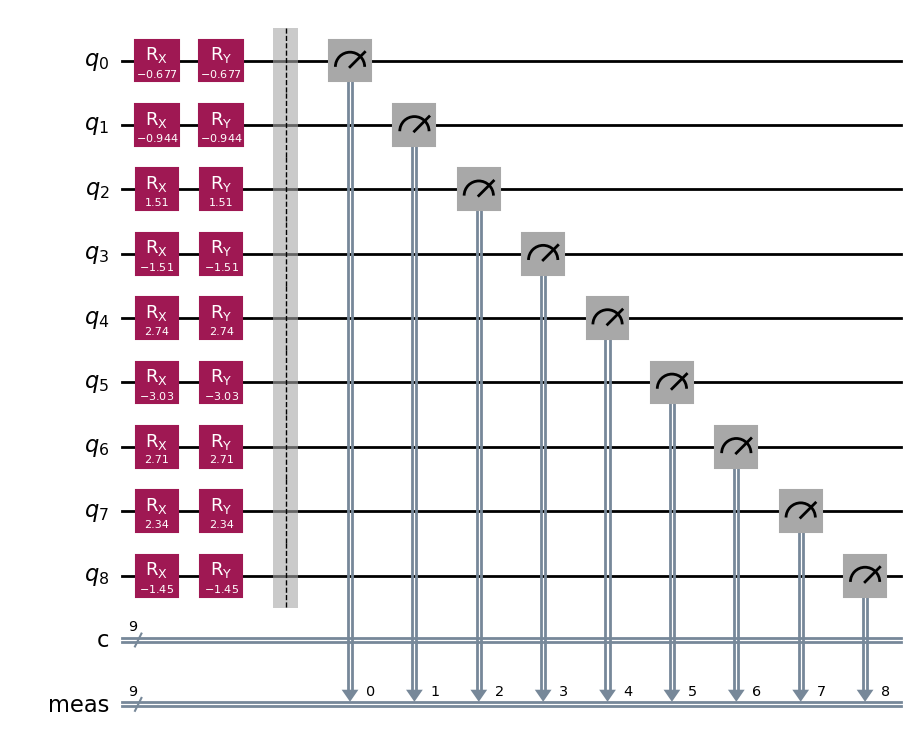

In [2]:
from qiskit import QuantumCircuit, transpile  # Import QuantumCircuit and transpile from qiskit
from qiskit_aer import AerSimulator  # Import AerSimulator from qiskit_aer
from qiskit.visualization import plot_histogram  # For visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate turn2qubit mapping for an N-sized protein sequence
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '0100q1', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first five bits are '0100q1'
    fixed_bits = '0100q1'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

# Function to build the MJ interaction energy matrix
def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # Set random seed for reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Function to calculate the energy of folds
def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian for each bit string (i.e., the energy for each fold).
    Only 1-NN interactions are considered, and energy penalties are imposed for unrealistic configurations.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = hyperParams["turn2qubit"]
        config = list(config)
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert binary turns to decimal
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian Hgc
        # Penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian Hin
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                # Add the interaction energy
                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                # Add penalty for distance not equal to 1
                energies[idx] += lambda_dis * (d_ij - 1)

                # Add penalty for unphysical nearest-neighbor collisions
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# Function to construct the variational ansatz
def protein_config_ansatz(parameters):
    """
    Constructs a variational quantum circuit (ansatz) using the given parameters.
    """
    num_qubits = len(parameters)
    qc = QuantumCircuit(num_qubits, num_qubits)  # Add classical registers for measurement
    for i in range(num_qubits):
        qc.rx(parameters[i], i)  # Apply RX gate with the given parameter
        qc.ry(parameters[i], i)  # Add RY gate for more expressiveness
    qc.measure_all()  # Measure all qubits
    return qc

# CVaR-VQE objective function
def protein_vqe_objective(parameters, hyperParams):
    """
    Computes the CVaR energy for the given parameters using the variational quantum circuit.
    """
    # Construct the variational ansatz
    ansatz = protein_config_ansatz(parameters)
    
    # Simulate the circuit using AerSimulator
    simulator = AerSimulator()  # Use AerSimulator
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Prepare bitstrings for energy calculation
    bitstrings = []
    for key in counts.keys():
        # Remove spaces and ensure the key is a valid binary string
        key_clean = key.replace(" ", "")
        if all(c in "01" for c in key_clean):  # Check if the key is a valid binary string
            bitstrings.append(format(int(key_clean, 2), f'0{len(parameters)}b'))
    
    if not bitstrings:
        raise ValueError("No valid bitstrings found in measurement results.")
    
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    
    # Compute energies for the observed bitstrings
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort probabilities by energy
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    # Compute CVaR (Conditional Value at Risk)
    alpha = 0.025  # Cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)  # Adjust the last probability
    
    # Compute expectation energy (CVaR)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# Input: Protein sequence
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()

# Generate the turn2qubit mapping
turn2qubit = generate_turn2qubit(protein_sequence)

# Calculate the number of qubits required for variable bits
num_qubits_config = turn2qubit.count('q')

# Add 2 interaction qubits
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

# Print the results
print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

# Extract fixed and variable bits
fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

# Print fixed and variable bits
print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

# Build the MJ interaction energy matrix
interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

# Define hyperparameters
hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024  # Number of shots for simulation
}

# Define the objective function
obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# Initial guess for parameters (angles)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_qubits)

# Optimize using CVaR-VQE
result = minimize(obj_fcn, initial_parameters, method='COBYLA')
print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

# =========================
# Added block: Generate and display the ansatz circuit diagram
# =========================

# Create the variational ansatz circuit using the optimal parameters
optimal_circuit = protein_config_ansatz(result.x)

# Draw the circuit using the matplotlib drawer and display it
print("\nAnsatz Circuit Diagram:")
display(optimal_circuit.draw(output='mpl'))
plt.show()


Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100q1qqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


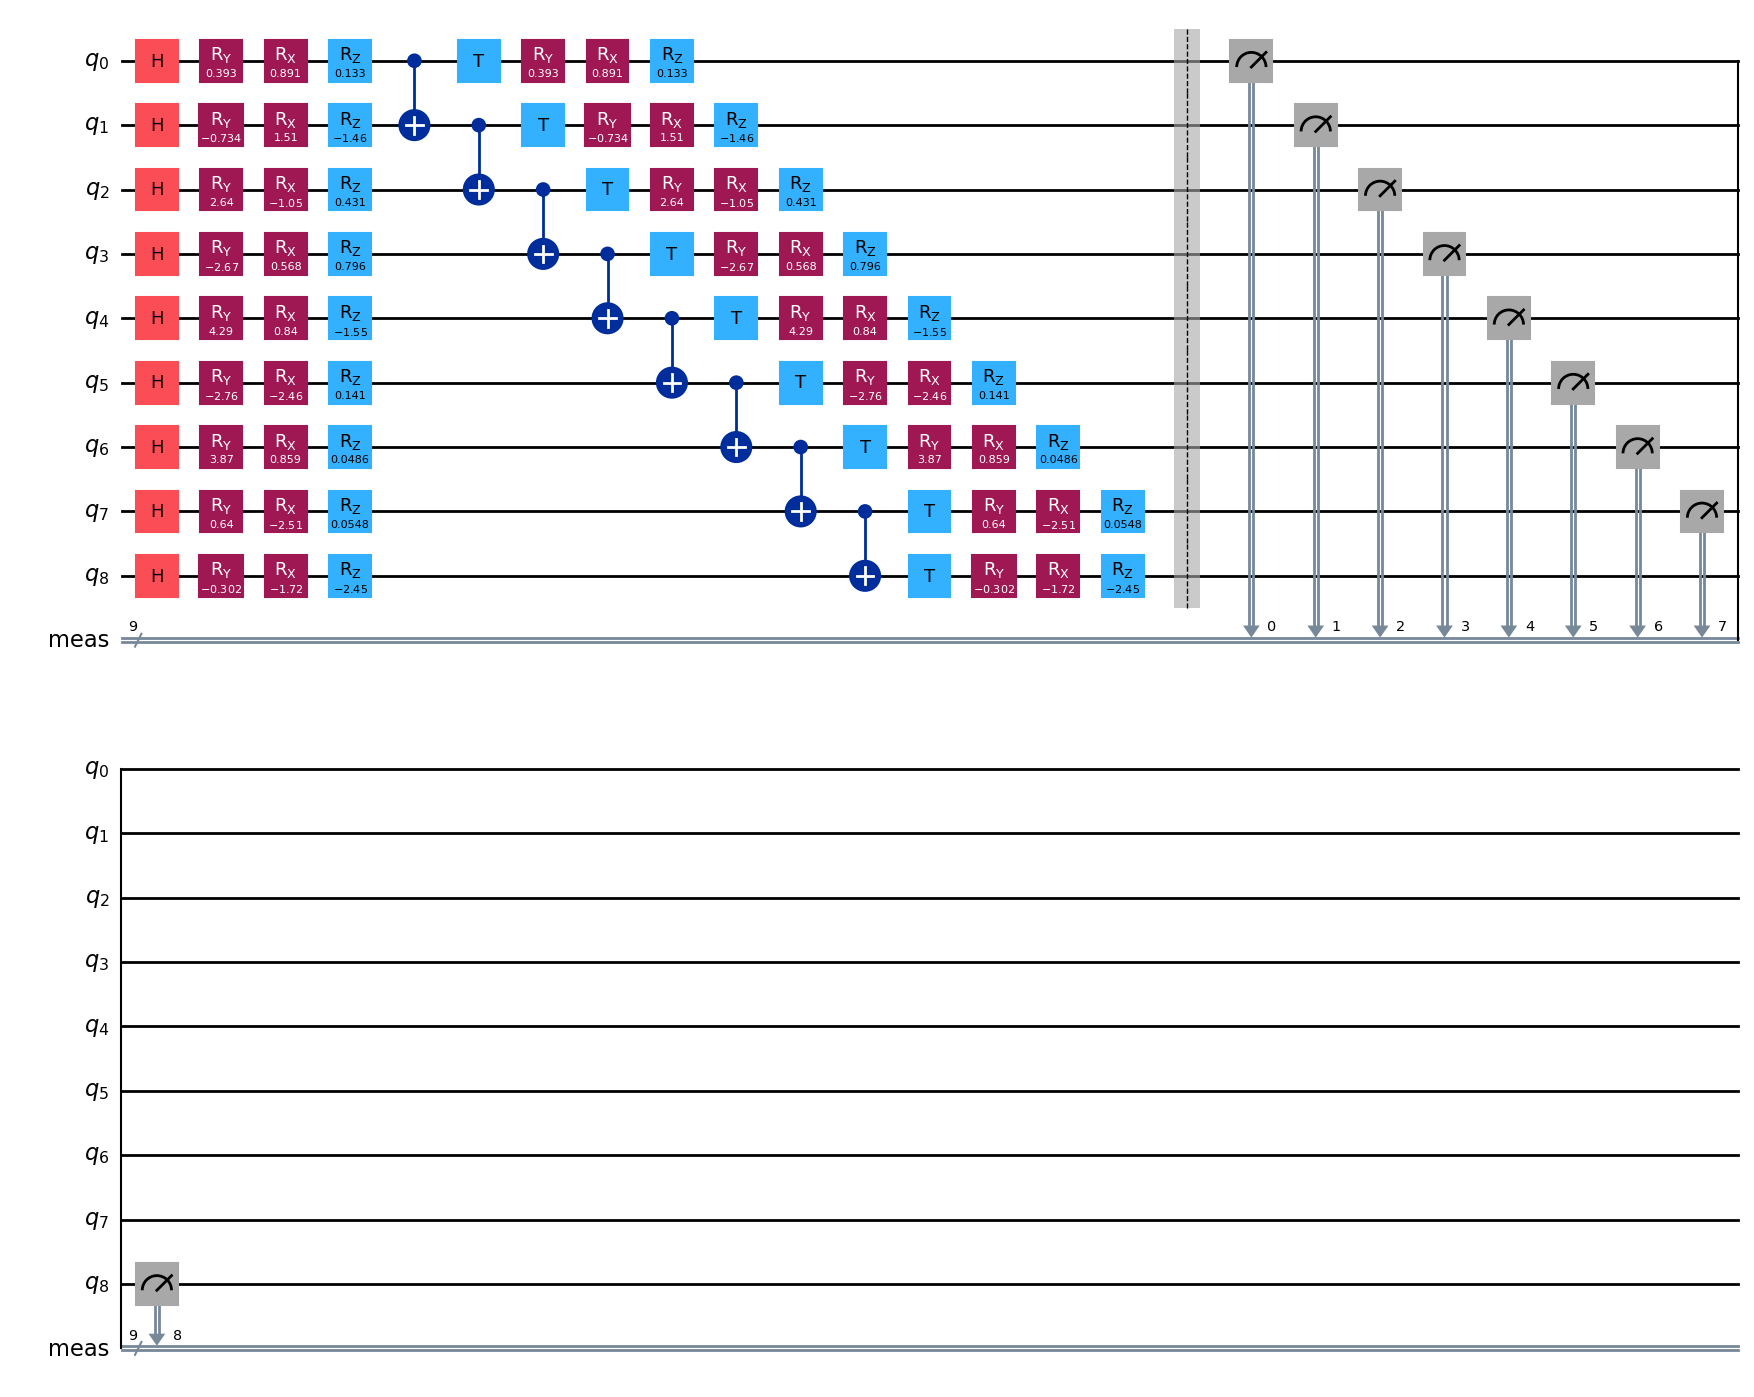

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate turn-to-qubit mapping
def generate_turn2qubit(protein_sequence):
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    num_turns = 2 * (N - 1)
    fixed_bits = '0100q1'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    return fixed_bits + variable_bits

# Build MJ interaction matrix
def build_mj_interactions(protein):
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)
    MJ = np.random.rand(20, 20) * -6
    MJ = np.triu(MJ) + np.triu(MJ, 1).T
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

# Compute energy from bitstrings
def exact_hamiltonian(bitstrings, hyperParams):
    lambda_dis = 720
    lambda_loc = 20
    lambda_back = 50
    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = list(hyperParams["turn2qubit"])
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break
                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue
                energies[idx] += hyperParams["interactionEnergy"][i, j]
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))
                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2
                energies[idx] += lambda_dis * (d_ij - 1)
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)
                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)
                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)
                curr_interaction_qubit += 1
    return energies

# New ansatz based on circuit image
def protein_config_ansatz(parameters):
    num_qubits = len(parameters) // 3
    qc = QuantumCircuit(num_qubits)

    # Layer 1: H + RX + RY + RZ
    for i in range(num_qubits):
        qc.h(i)
        qc.ry(parameters[i], i)
        qc.rx(parameters[i + num_qubits], i)
        qc.rz(parameters[i + 2 * num_qubits], i)

    # Entangling CNOTs (ladder)
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)

    # Mid-layer T gates
    for i in range(num_qubits):
        qc.t(i)

    # Repeat RX, RY, RZ gates (mirror layer)
    for i in range(num_qubits):
        qc.ry(parameters[i], i)
        qc.rx(parameters[i + num_qubits], i)
        qc.rz(parameters[i + 2 * num_qubits], i)

    qc.measure_all()
    return qc

# Objective function with CVaR
def protein_vqe_objective(parameters, hyperParams):
    ansatz = protein_config_ansatz(parameters)
    simulator = AerSimulator()
    compiled_circuit = transpile(ansatz, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    bitstrings = [format(int(k.replace(" ", ""), 2), f'0{len(parameters) // 3}b') for k in counts]
    probs = np.array(list(counts.values())) / hyperParams["numShots"]
    energies = exact_hamiltonian(bitstrings, hyperParams)
    sort_idx = np.argsort(energies)
    sorted_probs = probs[sort_idx]
    sorted_energies = energies[sort_idx]
    alpha = 0.025
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    return cvar_energy

# Main execution
protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()
turn2qubit = generate_turn2qubit(protein_sequence)
num_qubits_config = turn2qubit.count('q')
num_qubits_interaction = 2
total_qubits = num_qubits_config + num_qubits_interaction

print("Protein Sequence:", protein_sequence)
print("Turn-to-Qubit Mapping:", turn2qubit)
print("Number of Configuration Qubits:", num_qubits_config)
print("Number of Interaction Qubits:", num_qubits_interaction)
print("Total Qubits:", total_qubits)

fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']

print("\nFixed Bits:")
for idx, bit in fixed_bits:
    print(f"Bit {idx}: {bit}")

print("\nVariable Bits (Qubits):")
for idx, bit in variable_bits:
    print(f"Bit {idx}: {bit} (Qubit)")

interaction_energy = build_mj_interactions(protein_sequence)
print("\nInteraction Energy Matrix:")
print(interaction_energy)

hyperParams = {
    "protein": protein_sequence,
    "turn2qubit": turn2qubit,
    "numQubitsConfig": num_qubits_config,
    "interactionEnergy": interaction_energy,
    "numShots": 1024
}

obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams)

# New parameter size: 3 * total_qubits (due to RY, RX, RZ used twice)
initial_parameters = np.random.uniform(-np.pi, np.pi, size=3 * total_qubits)
result = minimize(obj_fcn, initial_parameters, method='COBYLA')

print("\nOptimization Result:")
print(f"Optimal Parameters: {result.x}")
print(f"Minimum CVaR Energy: {result.fun}")

# Generate and show the optimal circuit
optimal_circuit = protein_config_ansatz(result.x)
print("\nAnsatz Circuit Diagram:")
display(optimal_circuit.draw(output='mpl'))
plt.show()


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
from qiskit.circuit import ParameterVector
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# =============================================================================
# Part 1: Protein and Energy Setup
# =============================================================================
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '0100q1', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first five bits are '0100q1'
    fixed_bits = '0100q1'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    # Combine fixed and variable bits
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # For reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix with negative energies
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", 
             "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    # Fill the interaction energy matrix
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian (energy) for each configuration represented by bitstrings.
    The bitstrings are assumed to correspond to the configuration (variable) bits.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        # Replace variable bits in the turn2qubit mapping with the bitstring values.
        config = list(hyperParams["turn2qubit"])
        # Identify indices corresponding to variable bits ('q')
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        # The bitstring is assumed to be of length equal to the number of configuration qubits.
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert every 2-bit segment into a decimal turn
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian: penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break  # Stop if interaction qubits are exhausted

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute simplified distances between interacting beads
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                energies[idx] += lambda_dis * (d_ij - 1)
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# =============================================================================
# Part 2: Advanced Ansatz Circuit Definition
# =============================================================================
def advanced_ansatz(num_qubits, reps=2):
    """
    Constructs a multi-layer variational ansatz circuit.
    - Starts with a Hadamard layer on all qubits.
    - Each layer applies parameterized RY and RZ rotations, an entangling CNOT ladder, and T gates.
    - Measurement is added at the end.
    
    Returns:
      qc: The QuantumCircuit with symbolic parameters.
      param_vector: The ParameterVector containing all parameters.
    """
    total_params = 2 * num_qubits * reps  # Each qubit gets RY and RZ per layer
    param_vector = ParameterVector("θ", length=total_params)
    
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))  # Initial Hadamard on all qubits
    
    param_index = 0
    for layer in range(reps):
        # Parameterized single-qubit rotations for each qubit
        for qubit in range(num_qubits):
            qc.ry(param_vector[param_index], qubit)
            param_index += 1
            qc.rz(param_vector[param_index], qubit)
            param_index += 1
        
        # Entangling CNOT ladder: qubit 0->1, 1->2, ..., (n-2)->(n-1)
        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)
        
        # Add T gates on all qubits (optional)
        for qubit in range(num_qubits):
            qc.t(qubit)
    
    # Use explicit measurement so that classical bits map one-to-one with qubits
    qc.measure(range(num_qubits), range(num_qubits))
    return qc, param_vector

# =============================================================================
# Part 3: CVaR-VQE Objective with Advanced Ansatz
# =============================================================================
def protein_vqe_objective(parameters, hyperParams, reps=2):
    """
    Computes the CVaR energy using the advanced ansatz.
    The measurement outcome is assumed to be a bitstring of length total_qubits.
    We extract the configuration bits (the last numQubitsConfig bits) to feed into the
    energy evaluation.
    """
    total_qubits = hyperParams["totalQubits"]
    num_conf = hyperParams["numQubitsConfig"]  # Number of configuration qubits
    
    # Build the advanced ansatz circuit and retrieve its parameter vector.
    circuit, param_vector = advanced_ansatz(total_qubits, reps=reps)
    
    # Check parameter length
    if len(parameters) != len(param_vector):
        raise ValueError(f"Expected {len(param_vector)} parameters, but got {len(parameters)}.")
    
    param_bindings = {param_vector[i]: parameters[i] for i in range(len(param_vector))}
    bound_circuit = circuit.assign_parameters(param_bindings)
    
    # Simulate the circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(bound_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    # Process the measured bitstrings.
    # Qiskit returns bitstrings as strings of length total_qubits.
    # We assume that configuration bits are stored in the last num_conf bits.
    bitstrings = []
    sorted_keys = sorted(counts.keys())
    sorted_probs = []
    for key in sorted_keys:
        key_clean = key.replace(" ", "")
        if len(key_clean) != total_qubits:
            continue  # Skip unexpected outcomes
        # Extract configuration bits (last num_conf bits)
        conf_bits = key_clean[-num_conf:]
        bitstrings.append(conf_bits)
        sorted_probs.append(counts[key] / hyperParams["numShots"])
    sorted_probs = np.array(sorted_probs)
    
    if not bitstrings:
        raise ValueError("No valid configuration bitstrings found in measurement results.")
    
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Sort by energy and compute CVaR
    sort_idx = np.argsort(energies)
    sorted_probs = sorted_probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    alpha = 0.025  # CVaR cutoff parameter
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)
    
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    return cvar_energy

# =============================================================================
# Part 4: Main Routine
# =============================================================================
if __name__ == "__main__":
    # Input protein sequence from the user
    protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()
    
    # Generate mapping and energy matrix
    turn2qubit = generate_turn2qubit(protein_sequence)
    num_qubits_config = turn2qubit.count('q')
    num_qubits_interaction = 2  # As given in the original setup
    total_qubits = num_qubits_config + num_qubits_interaction
    
    print("Protein Sequence:", protein_sequence)
    print("Turn-to-Qubit Mapping:", turn2qubit)
    print("Number of Configuration Qubits:", num_qubits_config)
    print("Number of Interaction Qubits:", num_qubits_interaction)
    print("Total Qubits:", total_qubits)
    
    # Display fixed and variable bits
    fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
    variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']
    
    print("\nFixed Bits:")
    for idx, bit in fixed_bits:
        print(f"Bit {idx}: {bit}")
    
    print("\nVariable Bits (Qubits):")
    for idx, bit in variable_bits:
        print(f"Bit {idx}: {bit} (Qubit)")
    
    # Build MJ interaction energy matrix
    interaction_energy = build_mj_interactions(protein_sequence)
    print("\nInteraction Energy Matrix:")
    print(interaction_energy)
    
    # Set hyperparameters
    hyperParams = {
        "protein": protein_sequence,
        "turn2qubit": turn2qubit,
        "numQubitsConfig": num_qubits_config,
        "interactionEnergy": interaction_energy,
        "numShots": 1024,
        "totalQubits": total_qubits  # Total qubits used in the circuit
    }
    
    # Decide on the number of ansatz layers (repetitions)
    reps = 2
    total_params = 2 * total_qubits * reps  # This many parameters are needed for the advanced ansatz
    
    # Define the objective function for the optimizer
    obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams, reps=reps)
    
    # Initial guess for parameters: random values in [-pi, pi]
    initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_params)
    
    # Optimize using COBYLA
    result = minimize(obj_fcn, initial_parameters, method='COBYLA')
    print("\nOptimization Result:")
    print(f"Optimal Parameters:\n{result.x}")
    print(f"Minimum CVaR Energy: {result.fun}")
    
    # =============================================================================
    # Part 5: Display the Final Bound Circuit Diagram
    # =============================================================================
    # Rebuild the advanced ansatz and bind the optimal parameters
    final_circuit, param_vector = advanced_ansatz(total_qubits, reps=reps)
    param_bindings = {param_vector[i]: result.x[i] for i in range(len(param_vector))}
    bound_final_circuit = final_circuit.assign_parameters(param_bindings)
    
    # Draw the circuit diagram using Qiskit's MPL drawer.
    final_fig = bound_final_circuit.draw(output='mpl')
    # Save the figure to a file and display it.
    final_fig.savefig("final_circuit.png")
    print("\nFinal circuit diagram saved as 'final_circuit.png'.")
    plt.show()  # This should open the image window if your environment supports it.


Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100q1qqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
from qiskit.circuit import ParameterVector
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# =============================================================================
# Part 1: Protein and Energy Setup
# =============================================================================
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '0100q1', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first five bits are '0100q1'
    fixed_bits = '0100q1'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # For reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix with negative energies
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", 
             "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian (energy) for each configuration represented by bitstrings.
    The bitstrings are assumed to correspond to the configuration (variable) bits.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        # Replace variable bits in the turn2qubit mapping with the bitstring values.
        config = list(hyperParams["turn2qubit"])
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert every 2-bit segment into a decimal turn
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian: penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute simplified distances
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                energies[idx] += lambda_dis * (d_ij - 1)
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# =============================================================================
# Part 2: Advanced Ansatz Circuit Definition
# =============================================================================
def advanced_ansatz(num_qubits, reps=2):
    """
    Constructs a multi-layer variational ansatz circuit.
    - Starts with a Hadamard layer on all qubits.
    - Each layer applies parameterized RY and RZ rotations, an entangling CNOT ladder, and T gates.
    - Measurement is added at the end.
    
    Returns:
      qc: The QuantumCircuit with symbolic parameters.
      param_vector: The ParameterVector containing all parameters.
    """
    total_params = 2 * num_qubits * reps  
    param_vector = ParameterVector("θ", length=total_params)
    
    # Note: We include classical register here so we can still measure for simulation.
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))  # Initial Hadamard

    param_index = 0
    for layer in range(reps):
        for qubit in range(num_qubits):
            qc.ry(param_vector[param_index], qubit)
            param_index += 1
            qc.rz(param_vector[param_index], qubit)
            param_index += 1
        
        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)
        
        for qubit in range(num_qubits):
            qc.t(qubit)
    
    # Measurement on all qubits
    qc.measure(range(num_qubits), range(num_qubits))
    
    return qc, param_vector

# =============================================================================
# Part 3: CVaR-VQE Objective with Advanced Ansatz
# =============================================================================
def protein_vqe_objective(parameters, hyperParams, reps=2):
    """
    Computes the CVaR energy using the advanced ansatz.
    """
    total_qubits = hyperParams["totalQubits"]
    num_conf = hyperParams["numQubitsConfig"]  
    
    circuit, param_vector = advanced_ansatz(total_qubits, reps=reps)
    
    # Ensure parameter length
    if len(parameters) != len(param_vector):
        raise ValueError(f"Expected {len(param_vector)} parameters, but got {len(parameters)}.")
    
    param_bindings = {param_vector[i]: parameters[i] for i in range(len(param_vector))}
    bound_circuit = circuit.assign_parameters(param_bindings)
    
    # Simulate
    simulator = AerSimulator()
    compiled_circuit = transpile(bound_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    bitstrings = []
    sorted_keys = sorted(counts.keys())
    sorted_probs = []
    for key in sorted_keys:
        key_clean = key.replace(" ", "")
        if len(key_clean) != total_qubits:
            continue
        conf_bits = key_clean[-num_conf:]
        bitstrings.append(conf_bits)
        sorted_probs.append(counts[key] / hyperParams["numShots"])
    sorted_probs = np.array(sorted_probs)
    
    if not bitstrings:
        raise ValueError("No valid configuration bitstrings found in measurement results.")
    
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # CVaR
    sort_idx = np.argsort(energies)
    sorted_probs = sorted_probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    alpha = 0.025  # CVaR cutoff
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# =============================================================================
# Part 4: Main Routine
# =============================================================================
if __name__ == "__main__":
    protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()
    
    # Generate mapping and energy matrix
    turn2qubit = generate_turn2qubit(protein_sequence)
    num_qubits_config = turn2qubit.count('q')
    num_qubits_interaction = 2  
    total_qubits = num_qubits_config + num_qubits_interaction
    
    print("Protein Sequence:", protein_sequence)
    print("Turn-to-Qubit Mapping:", turn2qubit)
    print("Number of Configuration Qubits:", num_qubits_config)
    print("Number of Interaction Qubits:", num_qubits_interaction)
    print("Total Qubits:", total_qubits)
    
    fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
    variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']
    
    print("\nFixed Bits:")
    for idx, bit in fixed_bits:
        print(f"Bit {idx}: {bit}")
    
    print("\nVariable Bits (Qubits):")
    for idx, bit in variable_bits:
        print(f"Bit {idx}: {bit} (Qubit)")
    
    interaction_energy = build_mj_interactions(protein_sequence)
    print("\nInteraction Energy Matrix:")
    print(interaction_energy)
    
    hyperParams = {
        "protein": protein_sequence,
        "turn2qubit": turn2qubit,
        "numQubitsConfig": num_qubits_config,
        "interactionEnergy": interaction_energy,
        "numShots": 1024,
        "totalQubits": total_qubits
    }
    
    reps = 2
    total_params = 2 * total_qubits * reps  
    obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams, reps=reps)
    
    initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_params)
    
    result = minimize(obj_fcn, initial_parameters, method='COBYLA')
    print("\nOptimization Result:")
    print(f"Optimal Parameters:\n{result.x}")
    print(f"Minimum CVaR Energy: {result.fun}")
    
    # =============================================================================
    # Part 5: Display the Final Bound Circuit Diagram (Without Classical Wires)
    # =============================================================================
    # Build the advanced ansatz *with* measurement for correctness:
    final_circuit_with_meas, param_vector = advanced_ansatz(total_qubits, reps=reps)
    
    # Bind parameters
    param_bindings = {param_vector[i]: result.x[i] for i in range(len(param_vector))}
    bound_final_circuit_with_meas = final_circuit_with_meas.assign_parameters(param_bindings)

    # --- Now remove measurement so we only see the ansatz in the final figure ---
    # Make a copy so we don't lose the original data needed for potential further analysis
    ansatz_only_circuit = bound_final_circuit_with_meas.remove_final_measurements(inplace=False)

    # Draw the ansatz-only circuit using Qiskit's MPL drawer
    final_fig = ansatz_only_circuit.draw(output='mpl')
    final_fig.savefig("final_circuit.png")
    print("\nFinal circuit diagram (ansatz only) saved as 'final_circuit.png'.")
    plt.show()


Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100q1qqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100q1qqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


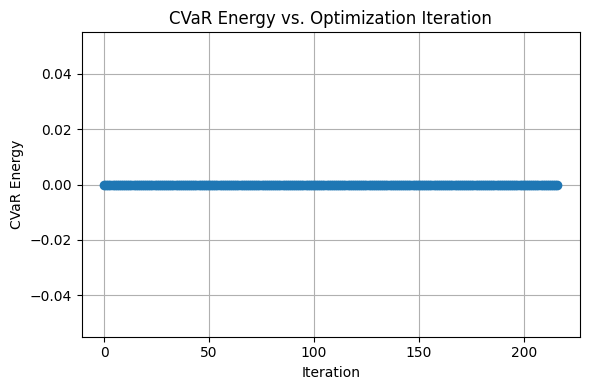

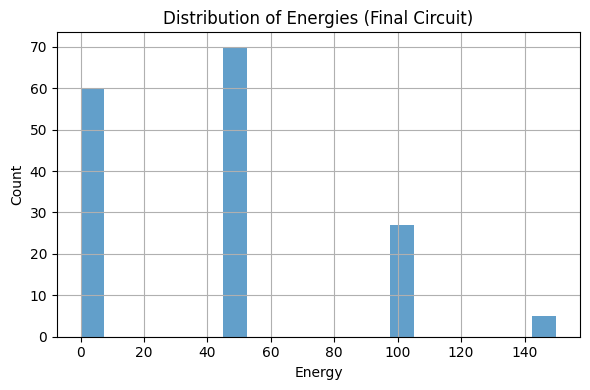


Best Measured Bitstring: 0001110
Best Measured Energy: 0.0


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
from qiskit.circuit import ParameterVector
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# =============================================================================
# Part 1: Protein and Energy Setup
# =============================================================================
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '0100q1', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    num_turns = 2 * (N - 1)
    fixed_bits = '0100q1'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)
    MJ = np.random.rand(20, 20) * -6
    MJ = np.triu(MJ) + np.triu(MJ, 1).T
    
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", 
             "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian (energy) for each configuration represented by bitstrings.
    """
    lambda_dis = 720  
    lambda_loc = 20   
    lambda_back = 50  

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        config = list(hyperParams["turn2qubit"])
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert every 2-bit segment into a decimal turn
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian: penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break
                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute simplified distances
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                energies[idx] += lambda_dis * (d_ij - 1)
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# =============================================================================
# Part 2: Advanced Ansatz Circuit Definition
# =============================================================================
def advanced_ansatz(num_qubits, reps=2):
    """
    Constructs a multi-layer variational ansatz circuit.
    """
    total_params = 2 * num_qubits * reps
    param_vector = ParameterVector("θ", length=total_params)
    
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))

    param_index = 0
    for layer in range(reps):
        for qubit in range(num_qubits):
            qc.ry(param_vector[param_index], qubit)
            param_index += 1
            qc.rz(param_vector[param_index], qubit)
            param_index += 1
        
        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)
        
        for qubit in range(num_qubits):
            qc.t(qubit)
    
    qc.measure(range(num_qubits), range(num_qubits))
    return qc, param_vector

# =============================================================================
# Part 3: CVaR-VQE Objective with Advanced Ansatz
# =============================================================================
def protein_vqe_objective(parameters, hyperParams, reps=2):
    """
    Computes the CVaR energy using the advanced ansatz.
    """
    total_qubits = hyperParams["totalQubits"]
    num_conf = hyperParams["numQubitsConfig"]
    
    circuit, param_vector = advanced_ansatz(total_qubits, reps=reps)
    
    if len(parameters) != len(param_vector):
        raise ValueError(f"Expected {len(param_vector)} parameters, but got {len(parameters)}.")
    
    param_bindings = {param_vector[i]: parameters[i] for i in range(len(param_vector))}
    bound_circuit = circuit.assign_parameters(param_bindings)
    
    simulator = AerSimulator()
    compiled_circuit = transpile(bound_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    bitstrings = []
    sorted_keys = sorted(counts.keys())
    sorted_probs = []
    for key in sorted_keys:
        key_clean = key.replace(" ", "")
        if len(key_clean) != total_qubits:
            continue
        conf_bits = key_clean[-num_conf:]
        bitstrings.append(conf_bits)
        sorted_probs.append(counts[key] / hyperParams["numShots"])
    sorted_probs = np.array(sorted_probs)
    
    if not bitstrings:
        raise ValueError("No valid configuration bitstrings found in measurement results.")
    
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # CVaR
    sort_idx = np.argsort(energies)
    sorted_probs = sorted_probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    alpha = 0.025
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1]
    cvar_probs[-1] += alpha - np.sum(cvar_probs)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha

    # <--- ADDED/CHANGED: Optionally, store all energies if you want them for plotting.
    # Return them in a dictionary or store them globally if needed.
    return cvar_energy, energies, bitstrings, sorted_probs

# =============================================================================
# Part 4: Main Routine
# =============================================================================
if __name__ == "__main__":
    protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()
    
    turn2qubit = generate_turn2qubit(protein_sequence)
    num_qubits_config = turn2qubit.count('q')
    num_qubits_interaction = 2
    total_qubits = num_qubits_config + num_qubits_interaction
    
    print("Protein Sequence:", protein_sequence)
    print("Turn-to-Qubit Mapping:", turn2qubit)
    print("Number of Configuration Qubits:", num_qubits_config)
    print("Number of Interaction Qubits:", num_qubits_interaction)
    print("Total Qubits:", total_qubits)
    
    fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
    variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']
    
    print("\nFixed Bits:")
    for idx, bit in fixed_bits:
        print(f"Bit {idx}: {bit}")
    
    print("\nVariable Bits (Qubits):")
    for idx, bit in variable_bits:
        print(f"Bit {idx}: {bit} (Qubit)")
    
    interaction_energy = build_mj_interactions(protein_sequence)
    print("\nInteraction Energy Matrix:")
    print(interaction_energy)
    
    hyperParams = {
        "protein": protein_sequence,
        "turn2qubit": turn2qubit,
        "numQubitsConfig": num_qubits_config,
        "interactionEnergy": interaction_energy,
        "numShots": 1024,
        "totalQubits": total_qubits
    }
    
    reps = 2
    total_params = 2 * total_qubits * reps
    initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_params)
    
    # <--- ADDED/CHANGED: We store iteration energies to make a progress plot later
    iteration_energies = []
    def callback_fcn(current_params):
        # Evaluate energy at each iteration (this can slow down optimization)
        val, _, _, _ = protein_vqe_objective(current_params, hyperParams, reps=reps)
        iteration_energies.append(val)

    # <--- We wrap the objective so we return only the CVaR energy to the optimizer
    def obj_fcn(theta):
        cvar_energy, _, _, _ = protein_vqe_objective(theta, hyperParams, reps=reps)
        return cvar_energy

    # <--- Use COBYLA or other methods
    result = minimize(obj_fcn, initial_parameters, method='COBYLA', callback=callback_fcn)
    
    # <--- Evaluate final energies to get distribution
    final_cvar, final_energies, final_bitstrings, final_probs = protein_vqe_objective(result.x, hyperParams, reps=reps)
    
    print("\nOptimization Result:")
    print(f"Optimal Parameters:\n{result.x}")
    print(f"Minimum CVaR Energy: {result.fun}")
    print(f"Final CVaR Energy (re-evaluated): {final_cvar}")

    # =============================================================================
    # Part 5A: Display the Final Bound Circuit Diagram (Without Classical Wires)
    # =============================================================================
    final_circuit_with_meas, param_vector = advanced_ansatz(total_qubits, reps=reps)
    param_bindings = {param_vector[i]: result.x[i] for i in range(len(param_vector))}
    bound_final_circuit_with_meas = final_circuit_with_meas.assign_parameters(param_bindings)

    # Remove measurement so we only see the ansatz
    ansatz_only_circuit = bound_final_circuit_with_meas.remove_final_measurements(inplace=False)
    fig_ansatz = ansatz_only_circuit.draw(output='mpl')
    fig_ansatz.savefig("final_circuit.png")
    print("\nFinal circuit diagram (ansatz only) saved as 'final_circuit.png'.")
    plt.show()

    # =============================================================================
    # Part 5B: Plot Iteration Energies
    # =============================================================================
    plt.figure(figsize=(6,4))
    plt.plot(range(len(iteration_energies)), iteration_energies, marker='o')
    plt.title("CVaR Energy vs. Optimization Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("CVaR Energy")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("optimization_progress.png")
    plt.show()

    # =============================================================================
    # Part 5C: Plot Energy Distribution (Histogram)
    # =============================================================================
    plt.figure(figsize=(6,4))
    plt.hist(final_energies, bins=20, alpha=0.7)
    plt.title("Distribution of Energies (Final Circuit)")
    plt.xlabel("Energy")
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("energy_distribution.png")
    plt.show()

    # =============================================================================
    # OPTIONAL: Identify the Minimum-Energy Bitstring and Plot or Print
    # =============================================================================
    min_energy_idx = np.argmin(final_energies)
    best_bitstring = final_bitstrings[min_energy_idx]
    best_energy = final_energies[min_energy_idx]
    
    print(f"\nBest Measured Bitstring: {best_bitstring}")
    print(f"Best Measured Energy: {best_energy}")

    # Here you could add code to visualize the geometry implied by `best_bitstring`.
    # For instance, parse the 2-bit turns, place them in 2D/3D, etc.

    # Example placeholder for geometry plot (user would need to implement specifics):
    # plot_protein_geometry(best_bitstring, protein_sequence)
    # plt.show()


Protein Sequence: APRLRFY
Turn-to-Qubit Mapping: 0100q1qqqqqq
Number of Configuration Qubits: 7
Number of Interaction Qubits: 2
Total Qubits: 9

Fixed Bits:
Bit 0: 0
Bit 1: 1
Bit 2: 0
Bit 3: 0
Bit 5: 1

Variable Bits (Qubits):
Bit 4: q (Qubit)
Bit 6: q (Qubit)
Bit 7: q (Qubit)
Bit 8: q (Qubit)
Bit 9: q (Qubit)
Bit 10: q (Qubit)
Bit 11: q (Qubit)

Interaction Energy Matrix:
[[-5.53390395 -4.72771721 -1.94388946 -0.51822183 -1.94388946 -1.38003988
  -4.01036345]
 [-4.72771721 -4.60951269 -1.83195677 -3.62222835 -1.83195677 -1.78731284
  -5.77791223]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-0.51822183 -3.62222835 -5.08349252 -2.26905186 -5.08349252 -4.02884712
  -4.35038489]
 [-1.94388946 -1.83195677 -1.99039556 -5.08349252 -1.99039556 -3.21680516
  -2.67579237]
 [-1.38003988 -1.78731284 -3.21680516 -4.02884712 -3.21680516 -5.81265417
  -3.28677813]
 [-4.01036345 -5.77791223 -2.67579237 -4.35038489 -2.67579237 -3.28677813
  -3.52866027]]


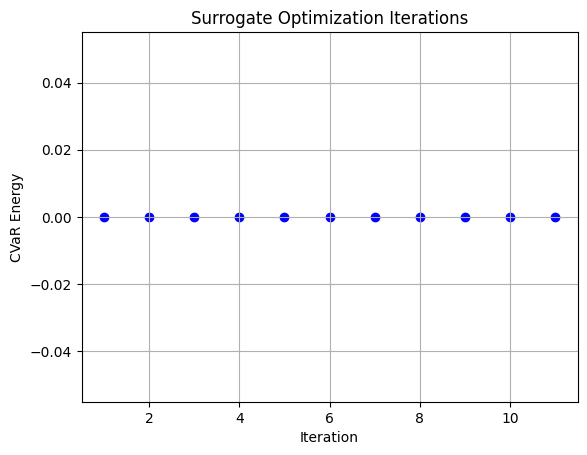

In [5]:
import sys
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
from qiskit.circuit import Parameter, ParameterVector
from scipy.optimize import minimize

# =============================================================================
# Part 1: Protein and Energy Setup
# =============================================================================
def generate_turn2qubit(protein_sequence):
    """
    Generates the turn2qubit mapping for a protein sequence.
    The first five bits are fixed as '0100q1', and the rest are variable ('q').
    """
    N = len(protein_sequence)
    if N < 2:
        raise ValueError("Protein sequence must have at least 2 beads.")
    
    # Calculate the number of turns: 2*(N-1)
    num_turns = 2 * (N - 1)
    
    # Fixed bits: first five bits are '0100q1'
    fixed_bits = '0100q1'
    
    # Variable bits: the rest are 'q'
    variable_bits = 'q' * (num_turns - len(fixed_bits))
    
    turn2qubit = fixed_bits + variable_bits
    return turn2qubit

def build_mj_interactions(protein):
    """
    Create the MJ interaction energy matrix for the protein, specified with 1-letter codes.
    """
    N = len(protein)
    mat = np.zeros((N, N))
    np.random.seed(29507)  # For reproducibility
    MJ = np.random.rand(20, 20) * -6  # Random MJ matrix with negative energies
    MJ = np.triu(MJ) + np.triu(MJ, 1).T  # Make symmetric
    
    # Amino acids and their indices
    acids = ["C", "M", "F", "I", "L", "V", "W", "Y", "A", "G", 
             "T", "S", "N", "Q", "D", "E", "H", "R", "K", "P"]
    acid2idx = {acid: idx for idx, acid in enumerate(acids)}
    
    for i in range(N):
        for j in range(N):
            mat[i, j] = MJ[acid2idx[protein[i]], acid2idx[protein[j]]]
    return mat

def exact_hamiltonian(bitstrings, hyperParams):
    """
    Compute the Hamiltonian (energy) for each configuration represented by bitstrings.
    The bitstrings are assumed to correspond to the configuration (variable) bits.
    """
    lambda_dis = 720  # Penalty for interaction distance
    lambda_loc = 20   # Penalty for interaction location
    lambda_back = 50  # Penalty for unphysical geometry

    energies = np.zeros(len(bitstrings))
    num_beads = len(hyperParams["protein"])

    for idx, bitstring in enumerate(bitstrings):
        # Replace variable bits in the turn2qubit mapping with the bitstring values.
        config = list(hyperParams["turn2qubit"])
        q_indices = [i for i, x in enumerate(config) if x == 'q']
        for i, q_idx in enumerate(q_indices):
            config[q_idx] = bitstring[i]
        config = ''.join(config)

        # Convert every 2-bit segment into a decimal turn
        turns = [int(config[i:i+2], 2) for i in range(0, len(config), 2)]

        # Geometric Hamiltonian: penalty for adjacent equal turns
        energies[idx] = lambda_back * sum(turns[i] == turns[i+1] for i in range(len(turns) - 1))

        # 1-NN Interaction Hamiltonian
        curr_interaction_qubit = hyperParams["numQubitsConfig"]
        for i in range(num_beads - 4):
            for j in range(i + 5, num_beads, 2):
                if curr_interaction_qubit >= len(bitstring):
                    break

                if bitstring[curr_interaction_qubit] == '0':
                    curr_interaction_qubit += 1
                    continue

                energies[idx] += hyperParams["interactionEnergy"][i, j]

                # Compute simplified distances
                delta_n_ij = np.zeros(4)
                delta_n_ir = np.zeros(4)
                delta_n_mj = np.zeros(4)
                for k in range(4):
                    delta_n_ij[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j))
                    delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j - 1))
                    delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i + 1, j))

                d_ij = np.linalg.norm(delta_n_ij)**2
                d_ir = np.linalg.norm(delta_n_ir)**2
                d_mj = np.linalg.norm(delta_n_mj)**2

                energies[idx] += lambda_dis * (d_ij - 1)
                energies[idx] += lambda_loc * (2 - d_ir)
                energies[idx] += lambda_loc * (2 - d_mj)

                if i - 1 >= 0:
                    for k in range(4):
                        delta_n_mj[k] = sum((-1)**m * (turns[m] == k) for m in range(i - 1, j))
                    d_mj = np.linalg.norm(delta_n_mj)**2
                    energies[idx] += lambda_loc * (2 - d_mj)

                if j + 1 < num_beads:
                    for k in range(4):
                        delta_n_ir[k] = sum((-1)**m * (turns[m] == k) for m in range(i, j + 1))
                    d_ir = np.linalg.norm(delta_n_ir)**2
                    energies[idx] += lambda_loc * (2 - d_ir)

                curr_interaction_qubit += 1

    return energies

# =============================================================================
# Part 2: Advanced Ansatz Circuit Definition (COBYLA optimization version)
# =============================================================================
def advanced_ansatz(num_qubits, reps=2):
    """
    Constructs a multi-layer variational ansatz circuit.
    - Starts with a Hadamard layer on all qubits.
    - Each layer applies parameterized RY and RZ rotations, an entangling CNOT ladder, and T gates.
    - Measurement is added at the end.
    
    Returns:
      qc: The QuantumCircuit with symbolic parameters.
      param_vector: The ParameterVector containing all parameters.
    """
    total_params = 2 * num_qubits * reps  
    param_vector = ParameterVector("θ", length=total_params)
    
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))  # Initial Hadamard

    param_index = 0
    for layer in range(reps):
        for qubit in range(num_qubits):
            qc.ry(param_vector[param_index], qubit)
            param_index += 1
            qc.rz(param_vector[param_index], qubit)
            param_index += 1
        
        for qubit in range(num_qubits - 1):
            qc.cx(qubit, qubit + 1)
        
        for qubit in range(num_qubits):
            qc.t(qubit)
    
    qc.measure(range(num_qubits), range(num_qubits))
    return qc, param_vector

# =============================================================================
# Part 3: CVaR-VQE Objective with Advanced Ansatz (COBYLA optimization version)
# =============================================================================
def protein_vqe_objective(parameters, hyperParams, reps=2):
    """
    Computes the CVaR energy using the advanced ansatz.
    """
    total_qubits = hyperParams["totalQubits"]
    num_conf = hyperParams["numQubitsConfig"]
    
    circuit, param_vector = advanced_ansatz(total_qubits, reps=reps)
    
    if len(parameters) != len(param_vector):
        raise ValueError(f"Expected {len(param_vector)} parameters, but got {len(parameters)}.")
    
    param_bindings = {param_vector[i]: parameters[i] for i in range(len(param_vector))}
    bound_circuit = circuit.assign_parameters(param_bindings)
    
    simulator = AerSimulator()
    compiled_circuit = transpile(bound_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
    result = job.result()
    counts = result.get_counts()
    
    bitstrings = []
    sorted_probs = []
    for key in sorted(counts.keys()):
        key_clean = key.replace(" ", "")
        if len(key_clean) != total_qubits:
            continue
        # configuration bits: take last num_conf bits
        conf_bits = key_clean[-num_conf:]
        bitstrings.append(conf_bits)
        sorted_probs.append(counts[key] / hyperParams["numShots"])
    sorted_probs = np.array(sorted_probs)
    
    if not bitstrings:
        raise ValueError("No valid configuration bitstrings found in measurement results.")
    
    energies = exact_hamiltonian(bitstrings, hyperParams)
    
    # Compute CVaR
    sort_idx = np.argsort(energies)
    sorted_probs = sorted_probs[sort_idx]
    sorted_energies = energies[sort_idx]
    
    alpha = 0.025  # CVaR cutoff
    cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
    cvar_probs = sorted_probs[:cut_idx + 1].copy()
    cvar_probs[-1] += alpha - np.sum(cvar_probs)
    cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx + 1]) / alpha
    
    return cvar_energy

# =============================================================================
# Part 4: Main Routine (COBYLA Optimization Version)
# =============================================================================
if __name__ == "__main__":
    protein_sequence = input("Enter the protein sequence (e.g., APRLRFY): ").strip().upper()
    
    # Generate mapping and energy matrix
    turn2qubit = generate_turn2qubit(protein_sequence)
    num_qubits_config = turn2qubit.count('q')
    num_qubits_interaction = 2  
    total_qubits = num_qubits_config + num_qubits_interaction
    
    print("Protein Sequence:", protein_sequence)
    print("Turn-to-Qubit Mapping:", turn2qubit)
    print("Number of Configuration Qubits:", num_qubits_config)
    print("Number of Interaction Qubits:", num_qubits_interaction)
    print("Total Qubits:", total_qubits)
    
    fixed_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit != 'q']
    variable_bits = [(idx, bit) for idx, bit in enumerate(turn2qubit) if bit == 'q']
    
    print("\nFixed Bits:")
    for idx, bit in fixed_bits:
        print(f"Bit {idx}: {bit}")
    
    print("\nVariable Bits (Qubits):")
    for idx, bit in variable_bits:
        print(f"Bit {idx}: {bit} (Qubit)")
    
    interaction_energy = build_mj_interactions(protein_sequence)
    print("\nInteraction Energy Matrix:")
    print(interaction_energy)
    
    hyperParams = {
        "protein": protein_sequence,
        "turn2qubit": turn2qubit,
        "numQubitsConfig": num_qubits_config,
        "interactionEnergy": interaction_energy,
        "numShots": 1024,
        "totalQubits": total_qubits
    }
    
    # ----------------------------
    # COBYLA optimization version
    # ----------------------------
    reps = 2
    total_params = 2 * total_qubits * reps  
    obj_fcn = lambda theta: protein_vqe_objective(theta, hyperParams, reps=reps)
    
    initial_parameters = np.random.uniform(-np.pi, np.pi, size=total_params)
    
    result = minimize(obj_fcn, initial_parameters, method='COBYLA')
    print("\nCOBYLA Optimization Result:")
    print(f"Optimal Parameters:\n{result.x}")
    print(f"Minimum CVaR Energy: {result.fun}")
    
    # Display the final bound circuit (ansatz only)
    final_circuit_with_meas, param_vector = advanced_ansatz(total_qubits, reps=reps)
    param_bindings = {param_vector[i]: result.x[i] for i in range(len(param_vector))}
    bound_final_circuit_with_meas = final_circuit_with_meas.assign_parameters(param_bindings)
    ansatz_only_circuit = bound_final_circuit_with_meas.remove_final_measurements(inplace=False)
    
    final_fig = ansatz_only_circuit.draw(output='mpl')
    final_fig.savefig("final_circuit.png")
    print("\nFinal circuit diagram (ansatz only) saved as 'final_circuit.png'.")
    plt.show()
    
    # =============================================================================
    # Part 5: Surrogate Optimization for CVaR-VQE (RY Angles Only)
    # =============================================================================
    # Automatically install scikit-optimize if not already installed.
    try:
        from skopt import gp_minimize
        from skopt.space import Real
    except ImportError:
        print("scikit-optimize not found. Installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-optimize"])
        from skopt import gp_minimize
        from skopt.space import Real
    
    # Define a new ansatz with only two layers of RY rotations.
    def advanced_ansatz_surrogate(num_qubits):
        qc = QuantumCircuit(num_qubits, num_qubits)
        qc.h(range(num_qubits))
        # Create parameters for two layers of RY rotations
        theta1 = [Parameter(f'θ1_{q}') for q in range(num_qubits)]
        theta2 = [Parameter(f'θ2_{q}') for q in range(num_qubits)]
        # First layer of RY rotations
        for q in range(num_qubits):
            qc.ry(theta1[q], q)
        # Entangling CNOT ladder
        for q in range(num_qubits - 1):
            qc.cx(q, q + 1)
        # Second layer of RY rotations
        for q in range(num_qubits):
            qc.ry(theta2[q], q)
        qc.measure(range(num_qubits), range(num_qubits))
        return qc, theta1, theta2

    def protein_vqe_objective_surrogate(parameters, hyperParams):
        """
        Objective function for surrogate optimization.
        'parameters' is a list of length 2*num_qubits.
        """
        num_qubits = hyperParams["totalQubits"]
        qc, theta1, theta2 = advanced_ansatz_surrogate(num_qubits)
        
        # Bind the RY angles from the surrogate optimization using assign_parameters
        param_bindings = {}
        for q in range(num_qubits):
            param_bindings[theta1[q]] = parameters[q]
            param_bindings[theta2[q]] = parameters[num_qubits + q]
        bound_circuit = qc.assign_parameters(param_bindings)
        
        simulator = AerSimulator()
        compiled_circuit = transpile(bound_circuit, simulator)
        job = simulator.run(compiled_circuit, shots=hyperParams["numShots"])
        result = job.result()
        counts = result.get_counts()
        
        bitstrings = []
        sorted_probs = []
        total_qubits = hyperParams["totalQubits"]
        num_conf = hyperParams["numQubitsConfig"]
        for key, count in counts.items():
            key_clean = key.replace(" ", "")
            if len(key_clean) != total_qubits:
                continue
            # Use the last num_conf bits as configuration bits
            conf_bits = key_clean[-num_conf:]
            bitstrings.append(conf_bits)
            sorted_probs.append(count / hyperParams["numShots"])
        if not bitstrings:
            return 1e6  # Return a large number if no valid results
        
        energies = exact_hamiltonian(bitstrings, hyperParams)
        sort_idx = np.argsort(energies)
        sorted_probs = np.array(sorted_probs)[sort_idx]
        sorted_energies = energies[sort_idx]
        alpha = 0.025
        cut_idx = np.searchsorted(np.cumsum(sorted_probs), alpha)
        cvar_probs = sorted_probs[:cut_idx+1].copy()
        cvar_probs[-1] += alpha - np.sum(cvar_probs)
        cvar_energy = np.dot(cvar_probs, sorted_energies[:cut_idx+1]) / alpha
        return cvar_energy

    numAngles = 2 * hyperParams["totalQubits"]
    # Define search space for each angle
    search_space = [Real(-np.pi, np.pi) for _ in range(numAngles)]
    
    # Set initial point to pi for all angles.
    initial_point = [np.pi] * numAngles
    
    # Run surrogate optimization (using gp_minimize) for 11 function evaluations.
    result_surrogate = gp_minimize(lambda x: protein_vqe_objective_surrogate(x, hyperParams),
                                   dimensions=search_space,
                                   n_calls=11,
                                   x0=initial_point,
                                   random_state=0)
    angles = result_surrogate.x
    minEnergy_surrogate = result_surrogate.fun

    print("\nSurrogate Optimization Result (RY angles only):")
    print(f"Optimal Angles:\n{angles}")
    print(f"Minimum CVaR Energy: {minEnergy_surrogate}")
    
    # Plot the evolution of the objective values (CVaR energies) over iterations.
    iterations = np.arange(1, len(result_surrogate.func_vals) + 1)
    plt.figure()
    plt.scatter(iterations, result_surrogate.func_vals, color='blue')
    plt.xlabel("Iteration")
    plt.ylabel("CVaR Energy")
    plt.title("Surrogate Optimization Iterations")
    plt.grid(True)
    plt.show()
